In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/ML_homework/hw5/train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

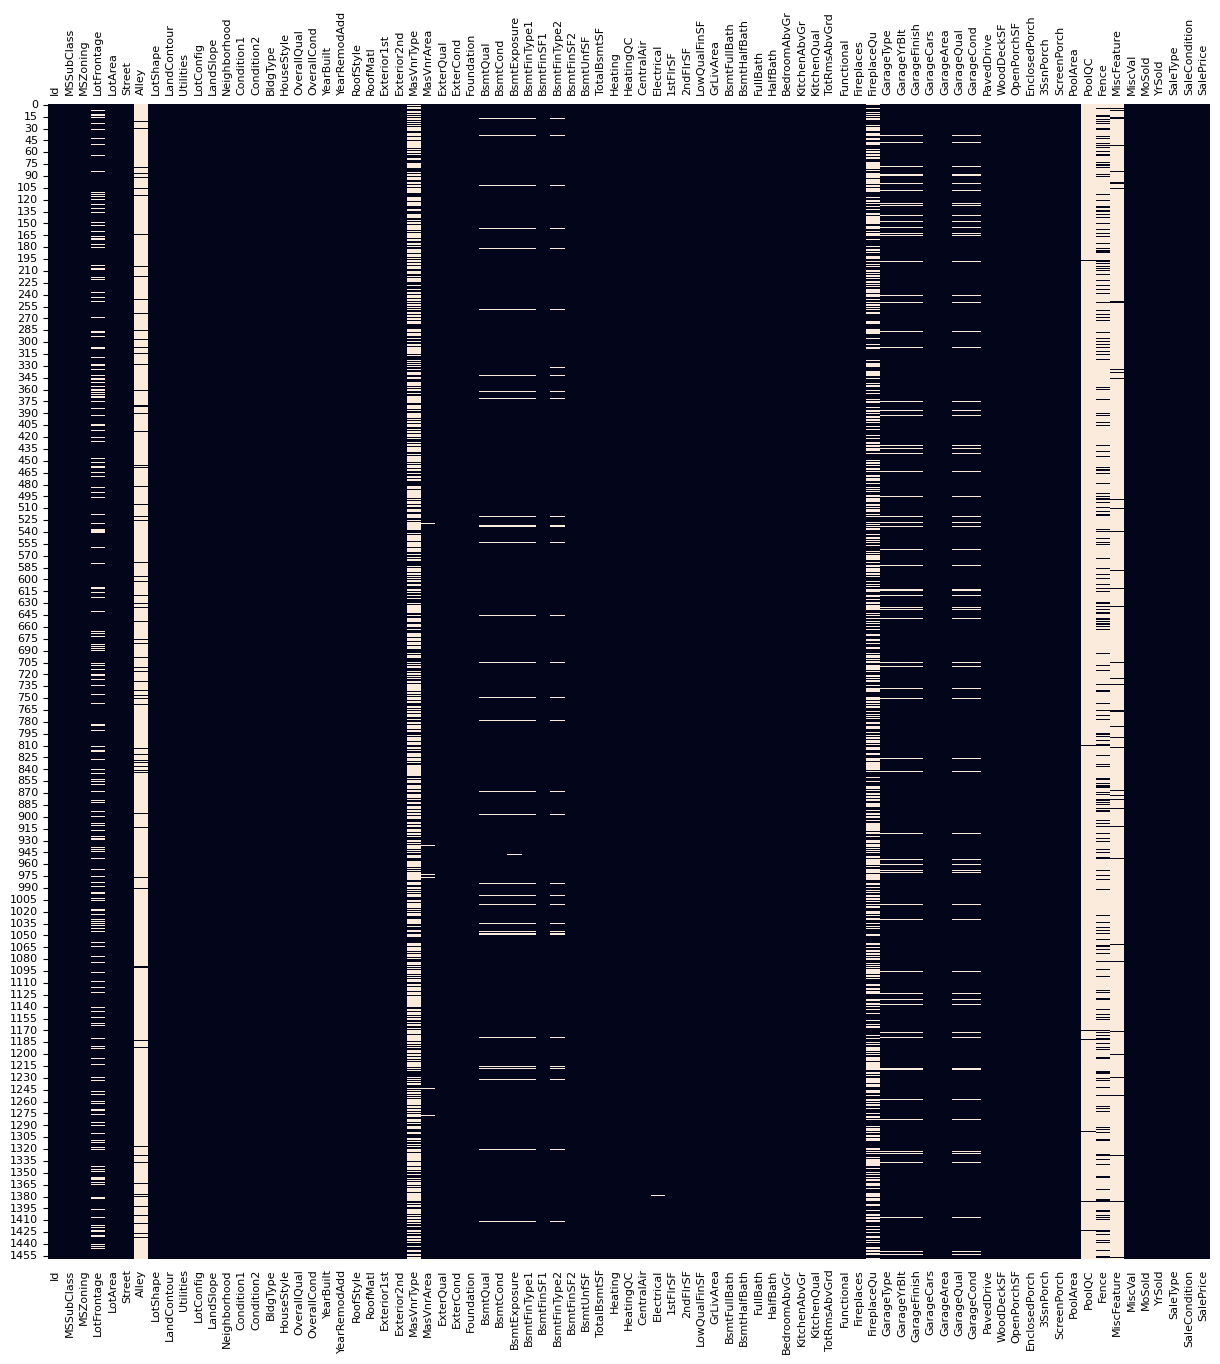

In [ ]:
# plot missing values
plt.figure(figsize = (15, 15))
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = True, bottom=False, top = False, labeltop=True)
sns.heatmap(df.isna(), cbar=False)

In [ ]:
# separate numerical features
df_num = df.select_dtypes(include=[np.number])
df_num.shape

(1460, 38)

<Axes: >

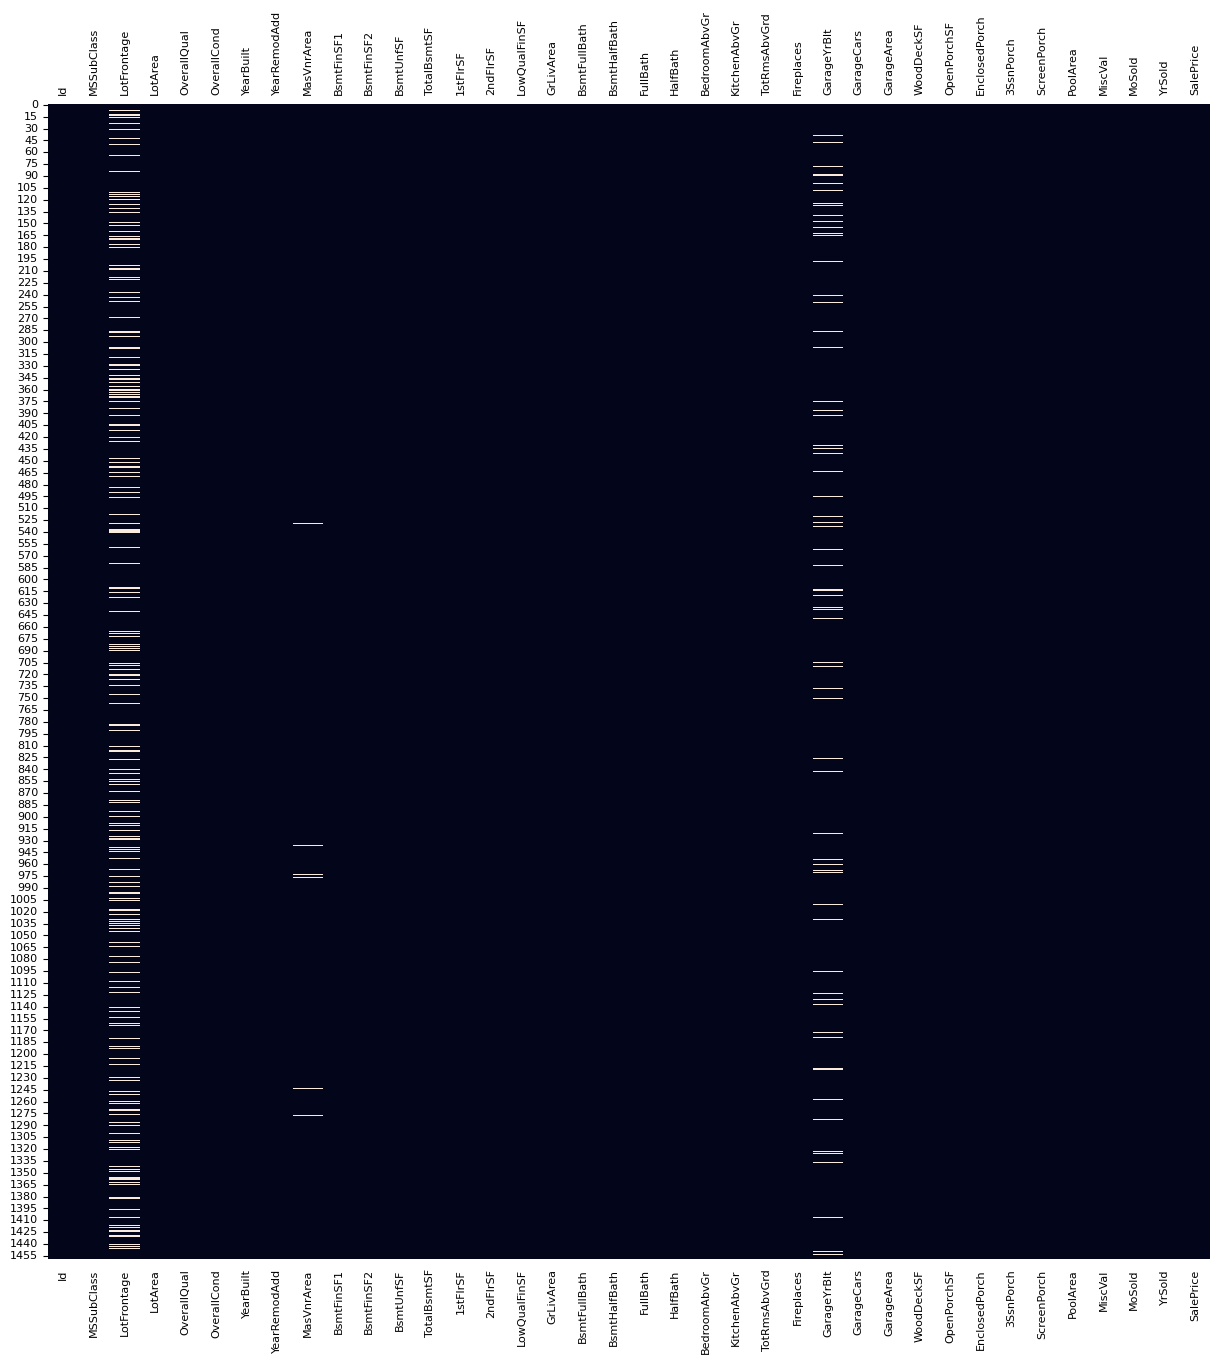

In [ ]:
# missing values in numerical features
plt.figure(figsize = (15, 15))
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = True, bottom=False, top = False, labeltop=True)
sns.heatmap(df_num.isna(), cbar=False)

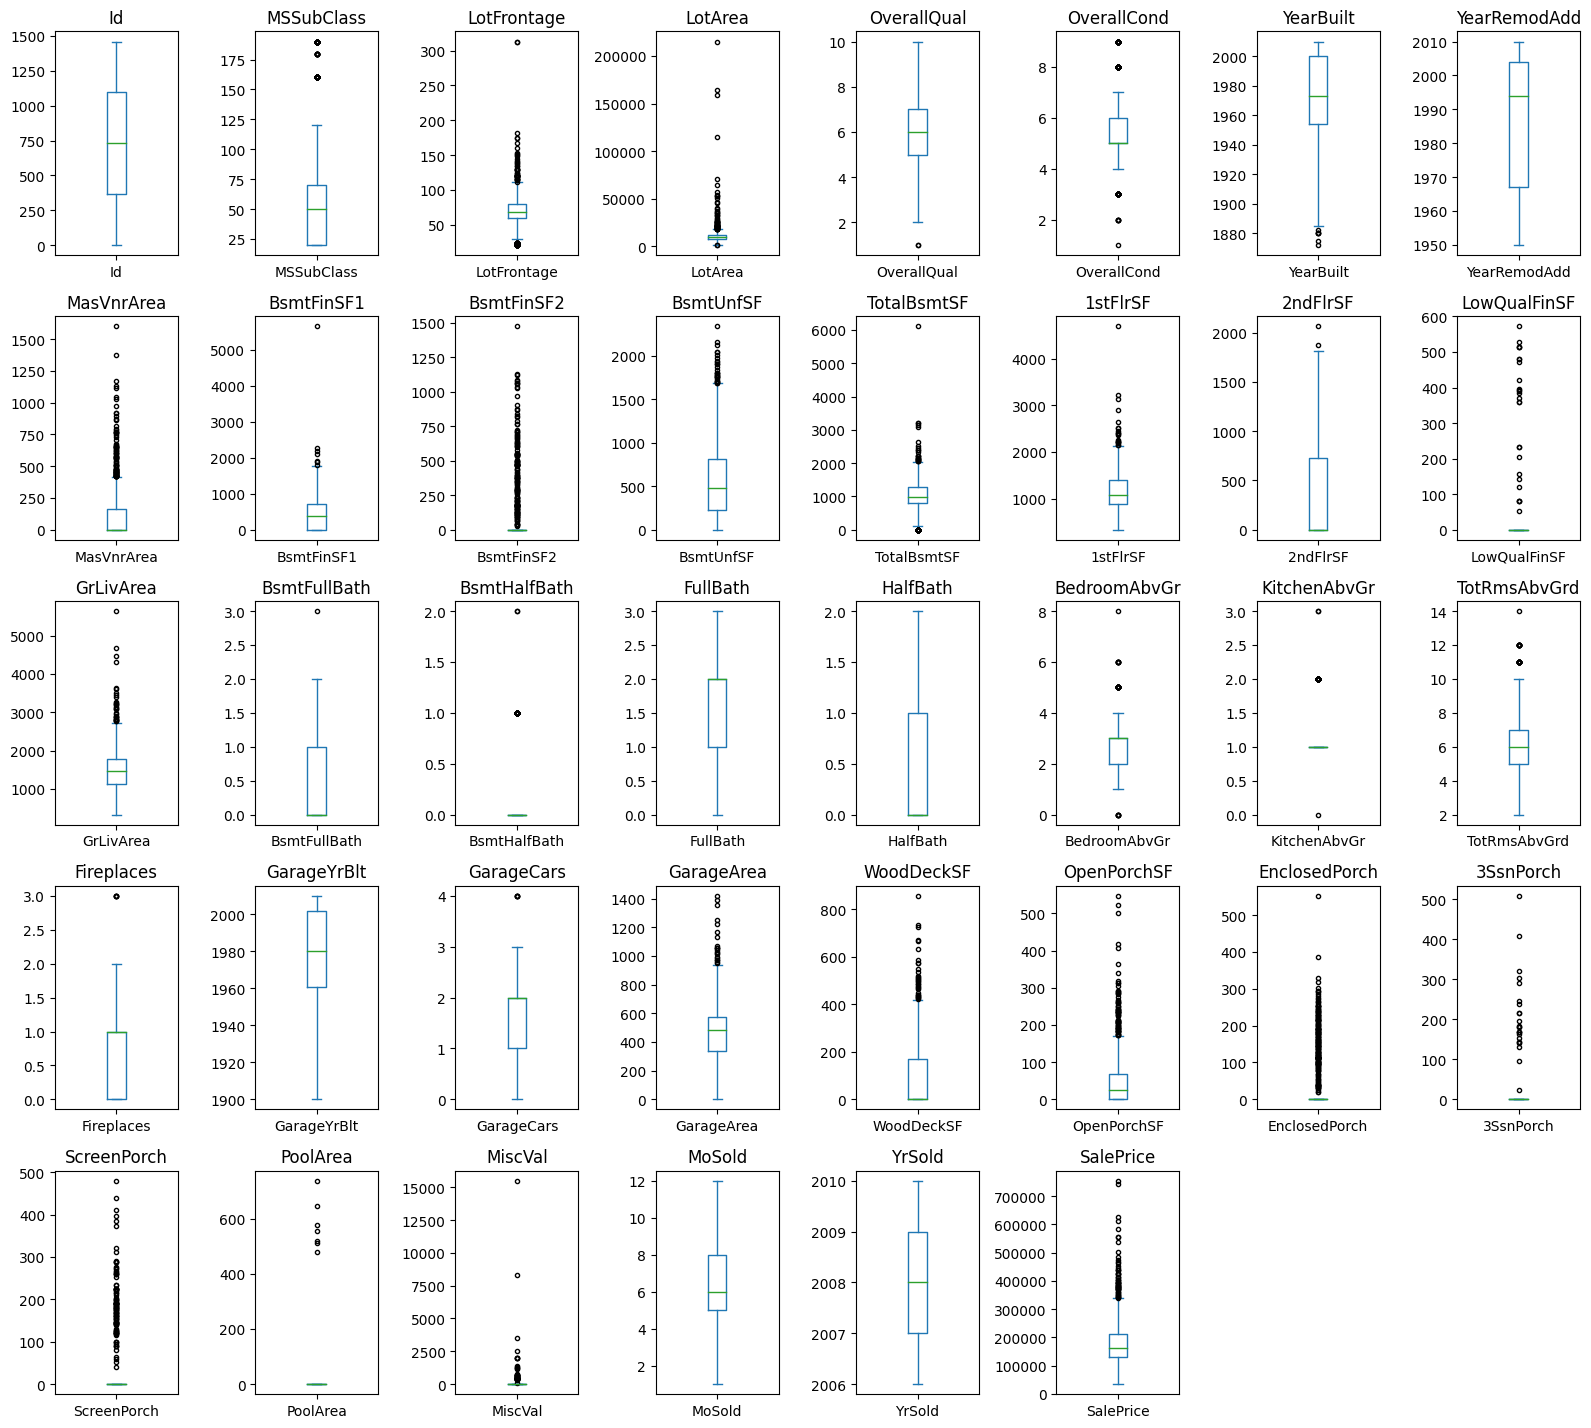

In [ ]:
# boxplots of numerical
df_num.plot.box(subplots=True, layout=(6, 8), figsize=(16, 17),
                     sharex=False, sharey=False, legend=False, title=list(df_num.columns),
                     flierprops={'marker': 'o', 'markersize': 3})
plt.tight_layout()

In [ ]:
# drop id column
df_num.drop(columns=['Id'], inplace=True)

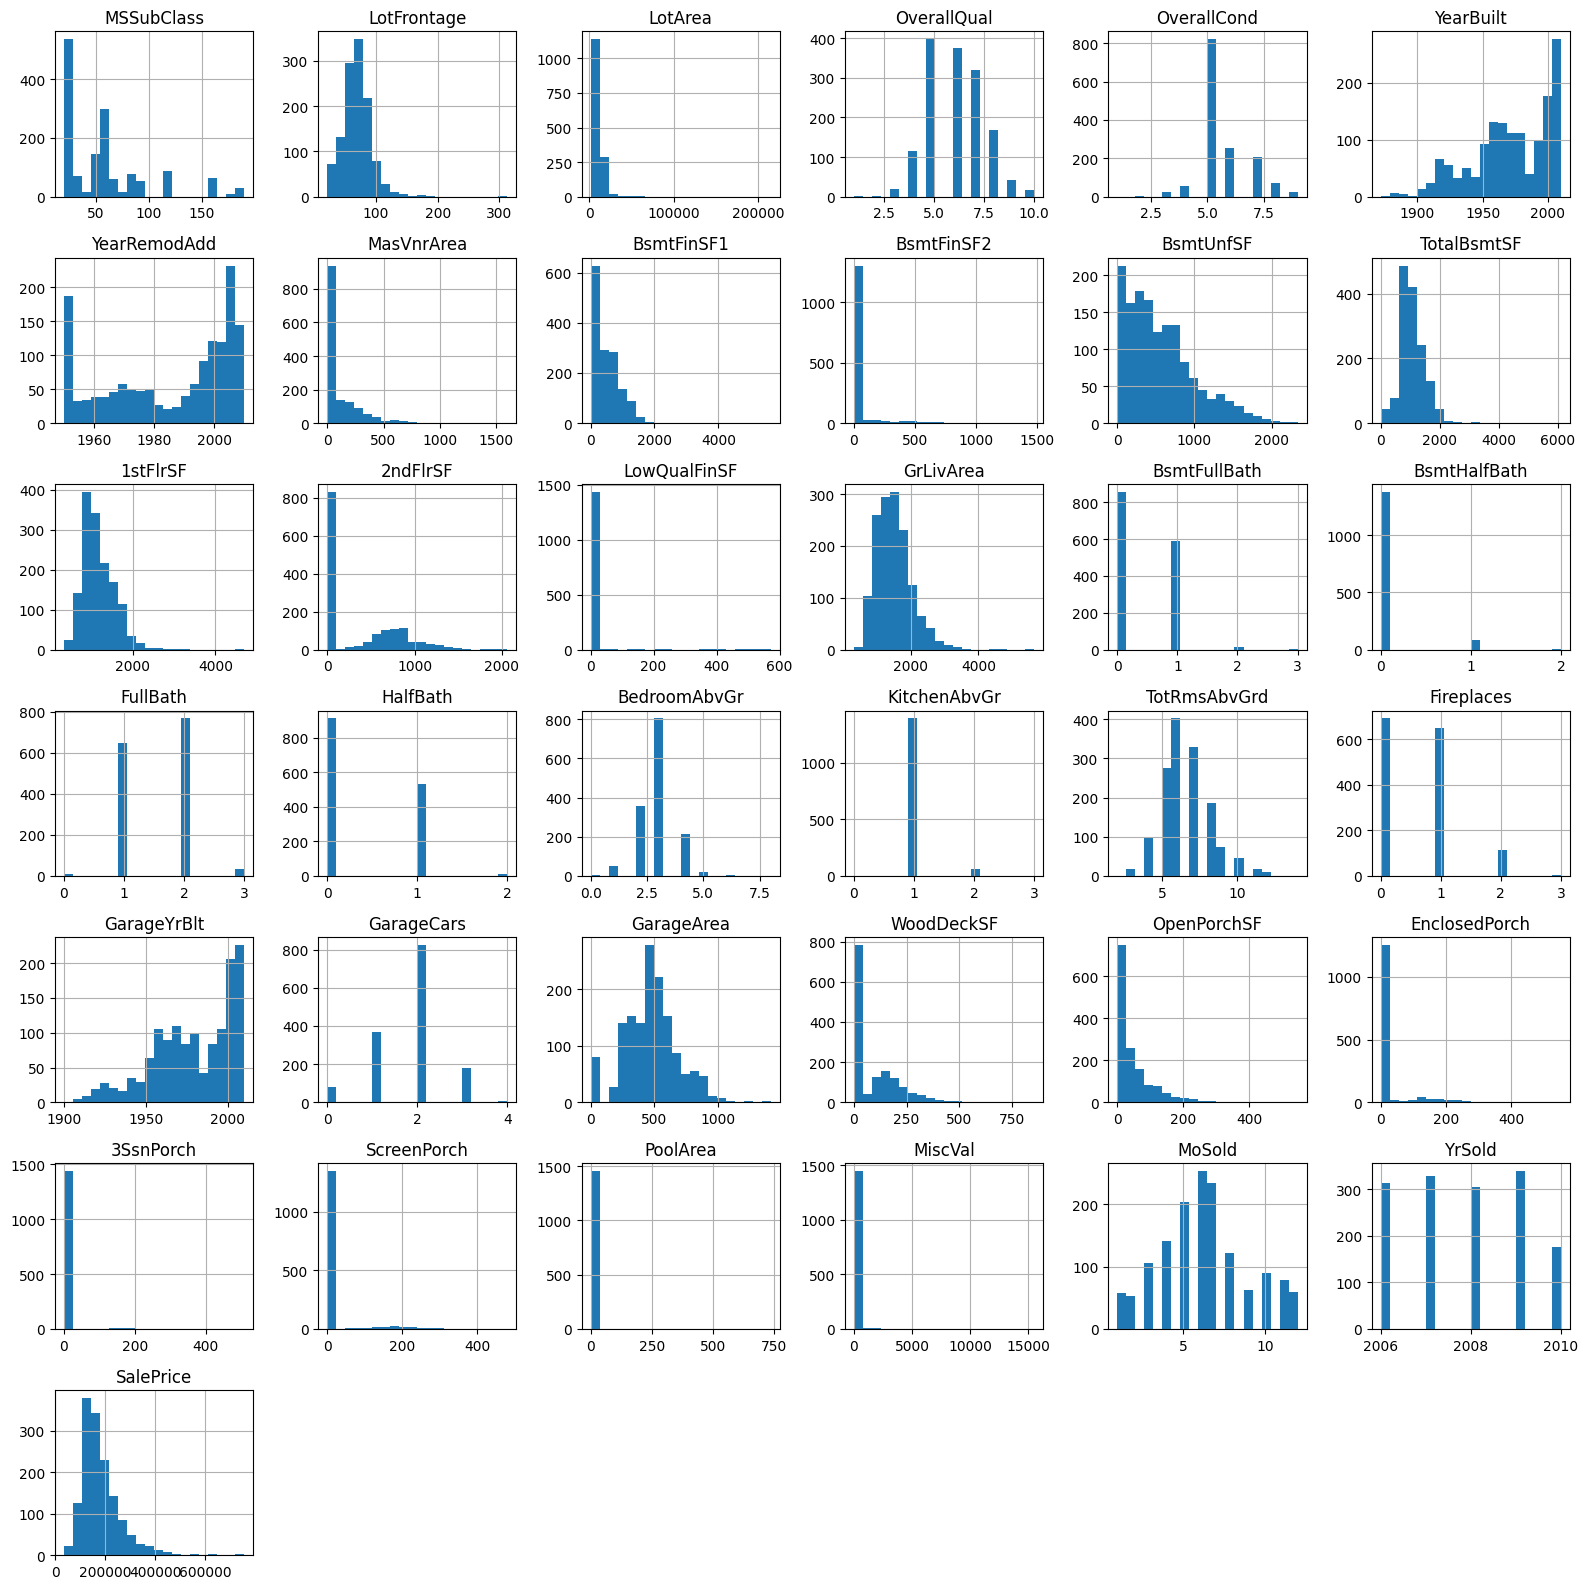

In [ ]:
# histplot of numerical features
df_num.hist(figsize=(16, 16), layout=(7,6), bins=20)
plt.tight_layout()

<Axes: >

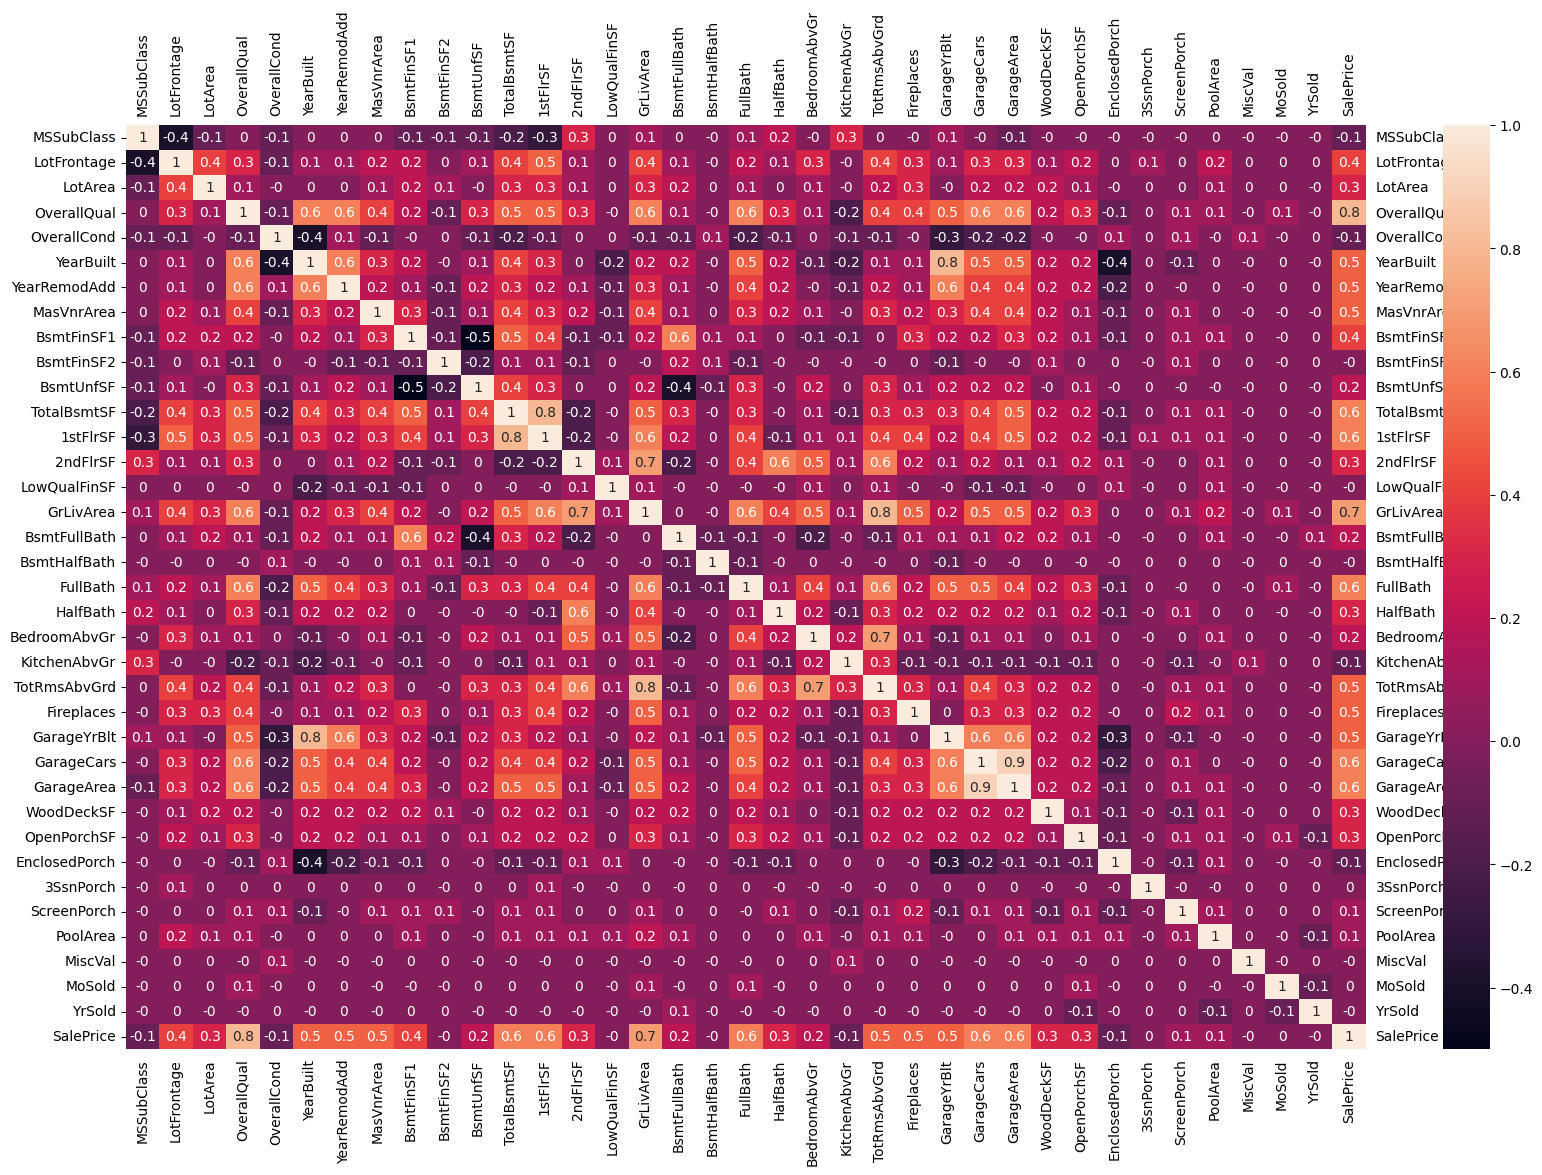

In [ ]:
# visualize correlation matrix
plt.figure(figsize = (20, 12))
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=False, top = False, labeltop=True, labelright=True)
sns.heatmap(df_num.corr().round(1), annot=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

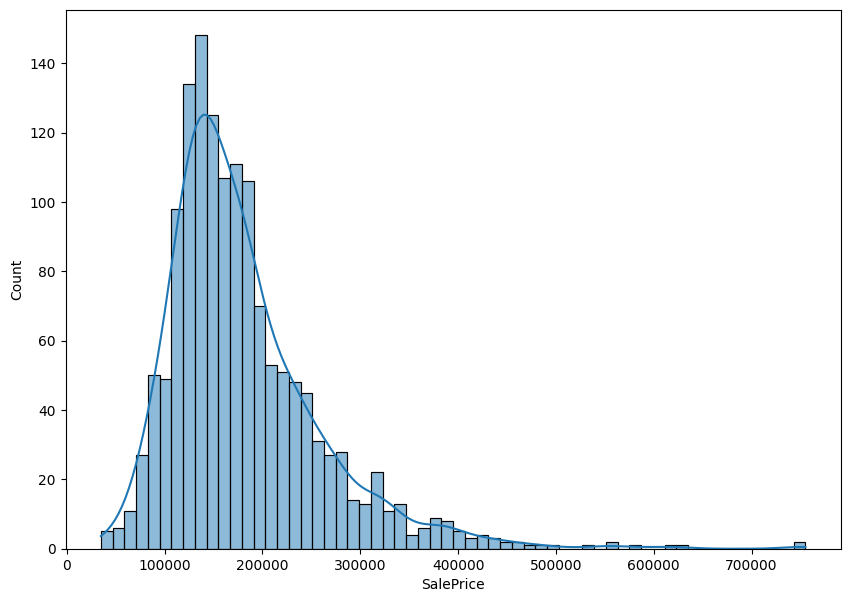

In [ ]:
# distribution of target variable
plt.figure(figsize=(10,7))
sns.histplot(df_num['SalePrice'], bins=60, kde=True)

In [ ]:
# filling missed values with 0
df_num.fillna(0, inplace=True)

# Hold out

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_num.drop(['SalePrice'], axis=1)
y = df_num['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrm = LinearRegression()

In [ ]:
lrm.fit(X_train, y_train)

LinearRegression()

In [ ]:
preds = lrm.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
print('MAE: ' + str(mean_absolute_error(y_test, preds)))
print('MSE: ' + str(mean_squared_error(y_test, preds)))

MAE: 23761.339104589893
MSE: 1536531789.7497225


# K-FOLD

In [ ]:
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm

In [ ]:
k = 5
kf = KFold(n_splits=k, random_state=100, shuffle=True)

In [ ]:
X = X.values
y = y.values

In [ ]:
fold_n = []
mse_scores = []
mae_scores = []
median_dist = [] #how far optimum from median, in case of MAE optimisation it should be close to 0

for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train = X[train_index, :]
  y_train = y[train_index]
  X_test = X[test_index, :]
  y_test = y[test_index]

  lrm = LinearRegression()
  lrm.fit(X_train, y_train)
  preds = lrm.predict(X_test)

  fold_n.append(i+1)
  mse_scores.append(mean_squared_error(y_test, preds))
  mae_scores.append(mean_absolute_error(y_test, preds))

  preds_train = lrm.predict(X_train)
  median_dist.append(((preds_train - y_train) / abs((preds_train - y_train))).sum()/2)

print(fold_n)
print(mse_scores)
print(mae_scores)
print(median_dist)

[1, 2, 3, 4, 5]
[1008248236.5973521, 1156969649.525157, 2239781195.967147, 1215072714.2452798, 1164948443.4091861]
[21885.078055570935, 22173.663309396336, 22980.491114337456, 21845.759614686573, 20273.131109420192]
[33.0, 55.0, 19.0, 45.0, 42.0]


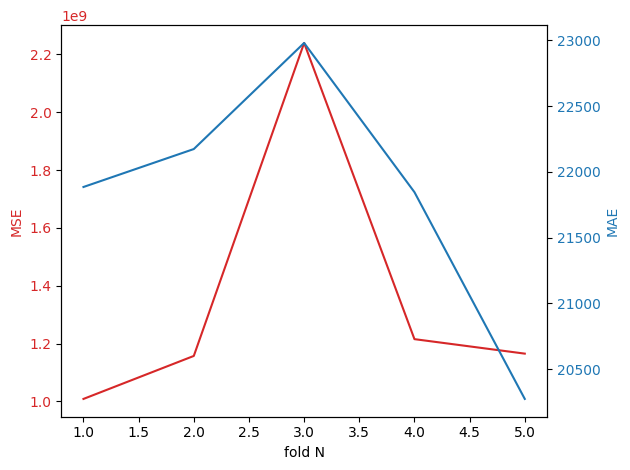

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('fold N')
ax1.set_ylabel('MSE', color=color)
ax1.plot(fold_n, mse_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('MAE', color=color)
ax2.plot(fold_n, mae_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


sgdr = make_pipeline(StandardScaler(),
                     SGDRegressor(loss='epsilon_insensitive', epsilon=10))

sgdr.fit(X_train, y_train)
preds_train = sgdr.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
preds_train = sgdr.predict(X_train)
print('MAE: ', mean_absolute_error(y_train, preds_train))
print('median distance: ', (((preds_train - y_train) / abs(preds_train - y_train)).sum())/2)

MAE:  180632.3022828662
median distance:  -489.0


In [ ]:
ylog = np.log10(y).copy()
X_train, X_test, y_train, y_test = train_test_split(X, ylog, test_size=0.33, random_state=42)
model2 = make_pipeline(
                     LinearRegression())
model2.fit(X_train, y_train)
preds2 = model2.predict(X_test)
mean_absolute_error(y_test, preds2)

0.04813751096921807

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/Machine Learning/ML_homework/hw5/sample_submission.csv')
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Machine Learning/ML_homework/hw5/test.csv')

In [ ]:
lrm.fit(X, y)

LinearRegression()

In [ ]:
test_num = test.select_dtypes(include=[np.number])
test_num.drop(columns=['Id'], inplace=True)
test_num.fillna(0, inplace=True)

predictions = lrm.predict(test_num)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions}).to_csv('subs.csv', index=False)


In [ ]:
subs = pd.read_csv('/content/subs.csv')

In [ ]:
subs

,Id,SalePrice
0,1461,119513.587770
1,1462,152368.593714
2,1463,172896.717712
3,1464,200219.967106
4,1465,194974.945597
...,...,...
1454,2915,75174.296747
1455,2916,60845.710496
1456,2917,179828.157665
1457,2918,118988.410555
